# Ujian Modul 2 - Purwadhika Data Science JC Program

## Context - Taken from Kaggle
Did you know that claims can be filed against TSA? Sometimes US Terminal Security Agency (TSA) makes mistakes. People can get hurt and property can be damaged, lost, or stolen. Claims are generally filed against TSA for personal injuries and lost or damaged property during screenings and they keep records of every claim!

### Content
The dataset includes claims filed between 2002 through 2015.

1. Claim Number
1. Date Received
1. Incident Date
1. Airport Code
1. Airport Name
1. Airline Name
1. Claim Type
1. Claim Site
1. Item
1. Claim Amount
1. Status
1. Close Amount
1. Disposition

This data is coming from the Kaggle Dataset that contain the data of claim that have been filed into the TSA. We would try to explore the data and clean the data partially (we would not clean and analyze everything as it would take more time than necessary) and we would only use 25% data from the original dataset.

This exam scoring would be explained below:

- This Notebook would have total score of 80 (+ 10 Bonus POINT for Bonus Question), which consist of:
    - 40 POINT for the Question part (10 point for each question)
    - 40 POINT for the preprocessing part by following the guide
- The Dashboard Tableau would yield 20 POINT
- The Maximum Score would be still 100, Bonus Question is just a Bonus. Work it if you have an extra time and already sure about all your other answer (or not sure about the other question, and need this bonus question to help)

When you finish, upload your notebook contain all the answer AND the Tableau Dashboard Link to regitaz@gmail.com. You do not need to upload the .csv file. 

Try to read the data and show all the important info first. For starter, try to understand what each column represent.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
df = pd.read_csv('C:/Users/adinatha/Desktop/UJIAN 2/tsa_claims.csv')

In [8]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


In [10]:
df.tail()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
204262,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
204263,2015123027969,17-Dec-15,2-Dec-15,-,-,-,Property Damage,Checked Baggage,Audio/Video; Home Decor,-,-,NaN,NaN
204264,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN
204265,2016011328300,30-Dec-15,28-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,-,-,NaN,NaN
204266,2015123128015,31-Dec-15,23-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Personal Accessories,-,-,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [22]:
df.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,204267,204004,202084,195743,195743,169893,196354,203527,200301,200224,204262,135315,131359
unique,204258,4007,26807,465,485,318,11,6,4704,36117,15,17162,3
top,2013050203487,2003-12-05 00:00:00,12/27/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,682,144,9596,9232,17553,117868,159753,36908,28445,68339,71546,68382
first,NaN,1994-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2055-05-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.nunique()

Claim Number     204258
Date Received      4007
Incident Date     26807
Airport Code        465
Airport Name        485
Airline Name        318
Claim Type           11
Claim Site            6
Item               4704
Claim Amount      36117
Status               15
Close Amount      17162
Disposition           3
dtype: int64

If you notice, there is '-' value that become a filler for an empty value. Replace all these '-' in every column into NaN object (np.nan) 

In [200]:
df = df.replace('-',np.nan)

Try to convert the Date Received and Incident Date data type into Datetime object. For the Incident Date columns, if you directly try to convert the column into datetime object it would raise an error notice. In that case, try to show the dataframe with the Incident Date column contain all the error.  

In [201]:
df['Date Received'] = pd.to_datetime(df['Date Received'])

In [202]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'])

In [203]:
df1=df.loc[df['Incident Date'].str.len() > 10]
df1

AttributeError: Can only use .str accessor with string values!

For the data in the Incident Date column that contain error, replace the year with the year that come from the Date Received column and replace the Incident Date data type into datetime object

In [205]:
df.replace(df['Incident Date'][7:10],df['Date Received'][0:3])

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full,-342.0
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle,-713.0
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle,-660.0
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full,-1083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35.0
204263,2015123027969,2015-12-17,2015-12-02,NaN,NaN,NaN,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,NaN,NaN,NaN,15.0
204264,2016010428072,2015-12-22,2015-12-20,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN,2.0
204265,2016011328300,2015-12-30,2015-12-28,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,NaN,NaN,NaN,2.0


In [206]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'],errors = 'coerce')

Check the data info and the dataframe that previously contain the error in their data to see if the data have been properly corrected.

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Claim Number     204267 non-null  object        
 1   Date Received    204004 non-null  datetime64[ns]
 2   Incident Date    201920 non-null  datetime64[ns]
 3   Airport Code     195302 non-null  object        
 4   Airport Name     195302 non-null  object        
 5   Airline Name     165646 non-null  object        
 6   Claim Type       196072 non-null  object        
 7   Claim Site       203251 non-null  object        
 8   Item             195878 non-null  object        
 9   Claim Amount     187472 non-null  object        
 10  Status           191510 non-null  object        
 11  Close Amount     135315 non-null  object        
 12  Disposition      131359 non-null  object        
 13  Day Differences  201781 non-null  float64       
dtypes: datetime64[ns](2)

In [208]:
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full,-342.0
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle,-713.0
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle,-660.0
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,-333.0
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full,-1083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN,35.0
204263,2015123027969,2015-12-17,2015-12-02,NaN,NaN,NaN,Property Damage,Checked Baggage,Audio/Video; Home Decor,NaN,NaN,NaN,NaN,15.0
204264,2016010428072,2015-12-22,2015-12-20,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN,2.0
204265,2016011328300,2015-12-30,2015-12-28,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,NaN,NaN,NaN,2.0


Create a new feature of the day differences between claim received and the day of the incident called Day Differences, which contain the days that come from the Date Received column substracted by the Incident Date column (Date Received - Incident Date). We have this feature to see the time differences between when the claim made with the incident that happen.

In [228]:
df['Day Differences'] = df['Date Received']-df['Incident Date']
df['Day Differences'] = df['Day Differences'].dt.days

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Claim Number     204267 non-null  object        
 1   Date Received    204004 non-null  datetime64[ns]
 2   Incident Date    201920 non-null  datetime64[ns]
 3   Airport Code     195302 non-null  object        
 4   Airport Name     195302 non-null  object        
 5   Airline Name     165646 non-null  object        
 6   Claim Type       196072 non-null  object        
 7   Claim Site       203251 non-null  object        
 8   Item             195878 non-null  object        
 9   Claim Amount     187472 non-null  object        
 10  Status           191510 non-null  object        
 11  Close Amount     135315 non-null  object        
 12  Disposition      131359 non-null  object        
 13  Day Differences  201781 non-null  float64       
dtypes: datetime64[ns](2)

Lets try to visualize the distribution of the Day Differences with all the NaN just to be dropped first

Text(0.5, 1.0, 'Day Differences Distribution')

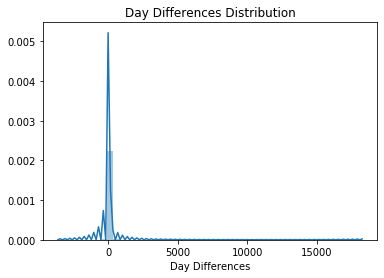

In [210]:
sns.distplot(df['Day Differences'].dropna()).set_title('Day Differences Distribution')

If we seen it from the plot, it seems there is days that less than 0 and even over than 1000. Lets try to visualize them both

In [236]:
dfa = df.loc[df['Day Differences'].values < 0]

Text(0.5, 1.0, 'Day Differences Distribution less than 0')

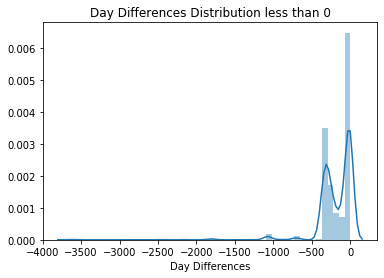

In [237]:
sns.distplot(dfa['Day Differences'].dropna()).set_title('Day Differences Distribution less than 0')

In [238]:
dfb = df.loc[df['Day Differences'].values > 1000]


Text(0.5, 1.0, 'Day Differences Distribution over than 1000')

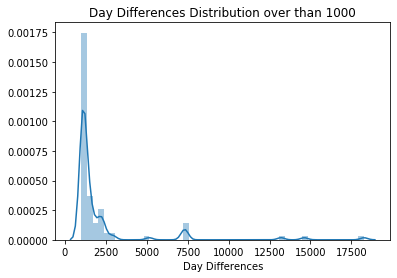

In [239]:
sns.distplot(dfb['Day Differences'].dropna()).set_title('Day Differences Distribution over than 1000')

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

In [ ]:
# if the Date Received is sooner than the Incident Date, wo could be sure that it was a mistake on the datasets.
# However if the Day Differences takes more than a thousand days also could be a mistake in the datasets but in some rare occurences it could actually happen. 

Remove the $ sign (some data need even more clean up by replacing the ; sign into . sign) from the Claim Amount columns and Close Amount columns, and change those columns datatype into float datatype

In [240]:
df['Claim Amount']=df['Claim Amount'].str.replace('$','')
df['Claim Amount']=df['Claim Amount'].str.replace(';','.')
df['Close Amount']=df['Close Amount'].str.replace('$','')
df['Close Amount']=df['Close Amount'].str.replace(';','.')
df

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full,-342.0
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle,-713.0
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle,-660.0
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,-333.0
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers. car seats. playpen. etc.,84.79,Approved,84.79,Approve in Full,-1083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204262,2015120427297,2015-11-20,2015-10-16,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses. Books. Magazines & Other...,NaN,NaN,NaN,NaN,35.0
204263,2015123027969,2015-12-17,2015-12-02,NaN,NaN,NaN,Property Damage,Checked Baggage,Audio/Video. Home Decor,NaN,NaN,NaN,NaN,15.0
204264,2016010428072,2015-12-22,2015-12-20,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Clothing,NaN,NaN,NaN,NaN,2.0
204265,2016011328300,2015-12-30,2015-12-28,NaN,NaN,NaN,Passenger Property Loss,Checked Baggage,Tools & Home Improvement Supplies,NaN,NaN,NaN,NaN,2.0


Create a new columns called Amount Differences by substract the Claim Amount with Close Amount columns

In [245]:
df['Claim Amount'] = pd.to_numeric(df['Claim Amount'], errors = 'coerce')
df['Close Amount'] = pd.to_numeric(df['Close Amount'], errors = 'coerce')
df['Amount Differences'] = df['Claim Amount'] - df['Close Amount']


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Claim Number        204267 non-null  object        
 1   Date Received       204004 non-null  datetime64[ns]
 2   Incident Date       201920 non-null  datetime64[ns]
 3   Airport Code        195302 non-null  object        
 4   Airport Name        195302 non-null  object        
 5   Airline Name        165646 non-null  object        
 6   Claim Type          196072 non-null  object        
 7   Claim Site          203251 non-null  object        
 8   Item                195878 non-null  object        
 9   Claim Amount        168588 non-null  float64       
 10  Status              191510 non-null  object        
 11  Close Amount        133302 non-null  float64       
 12  Disposition         131359 non-null  object        
 13  Day Differences     201781 no

In [259]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
0,0909802M,2002-01-04,2002-12-12,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full,-342.0,0.00
1,0202417M,2002-02-02,2004-01-16,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),100.00,Settled,50.00,Settle,-713.0,50.00
2,0202445M,2002-02-04,2003-11-26,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle,-660.0,50.96
3,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full,-333.0,0.00
4,2005032379513,2002-02-18,2005-02-05,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers. car seats. playpen. etc.,84.79,Approved,84.79,Approve in Full,-1083.0,0.00


Lets try to visualize it again similar to the Day Differences feature, but this time we would use the Amount Differences feature (still just drop the NaN first)

Text(0.5, 1.0, 'Amount Differences Distribution')

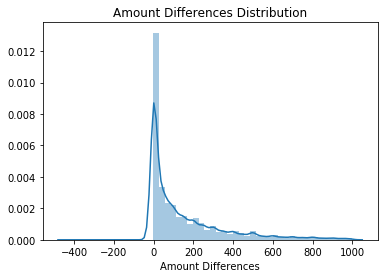

In [249]:
sns.distplot(df['Amount Differences'].dropna()).set_title('Amount Differences Distribution')

There is seems a differences in number that was way far. This time, lets use the Interquartile range (IQR) method to find the datapoint that seems to be an outlier based on the Amount Differences column, show the dataframe, and lets describe the Claim Amount and Close Amount column of the outlier dataframe based on the Amount Differences column

In [260]:
IQR = 218.3 #dari describe
df_out = df[df['Amount Differences'] >IQR]
df_out

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Day Differences,Amount Differences
5,2005032479636,2002-02-18,2005-02-17 00:00:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle,-1095.0,232.01
21,16410,2002-07-24,2002-07-10 00:00:00,SDF,Louisville International,Delta Air Lines,Passenger Property Loss,Checkpoint,Luggage (all types including footlockers),600.00,Settled,337.40,Settle,14.0,262.60
32,17201,2002-09-09,2002-08-19 00:00:00,PVD,TF Green Airport; Providence,Delta Air Lines,NaN,Other,Other,250.00,Denied,0.00,Deny,21.0,250.00
46,0909839M,2002-09-19,2002-12-31 00:00:00,DCA,Ronald Reagan Washington National Airport,NaN,Property Damage,Checkpoint,Cell Phones,250.00,Denied,0.00,Deny,-103.0,250.00
47,15542,2002-09-19,2002-07-01 00:00:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Property Damage,Other,Cameras - Digital,249.00,Denied,0.00,Deny,80.0,249.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145123,2010010867319,2009-12-30,2009-12-26 00:00:00,BHM,Birmingham International Airport,NaN,NaN,NaN,Electrical and Gas Appliances Minor - $200 or ...,348.00,Denied,0.00,Deny,4.0,348.00
145124,2010010867353,2009-12-30,2009-12-19 00:00:00,EWR,Newark International Airport,Continental Airlines,Passenger Property Loss,Checked Baggage,MP3 Players-(iPods. etc),358.00,Denied,0.00,Deny,11.0,358.00
145125,2010011267477,2009-12-30,2009-07-31 07:00:00,BUF,Buffalo Niagara International,Southwest Airlines,Property Damage,Checked Baggage,Luggage (all types including footlockers). Spo...,453.57,Denied,0.00,Deny,151.0,453.57
145130,2010010567190,2009-12-30,2009-12-19 18:30:00,SJC,Norman Y Mineta San Jose International,Southwest Airlines,Passenger Property Loss,Checked Baggage,Cameras - Digital. Cameras - Non-electronic (C...,445.06,Settled,99.53,Settle,10.0,345.53


In [277]:
df_out.describe()['Claim Amount']

count    29187.000000
mean       482.375024
std        202.723478
min        218.450000
25%        303.955000
50%        440.220000
75%        602.615000
max        999.990000
Name: Claim Amount, dtype: float64

In [278]:
df_out.describe()['Close Amount']

count    29187.000000
mean        32.054995
std         93.804100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        746.250000
Name: Close Amount, dtype: float64

It seems that Claim Amount feature really affecting lot of the differences that happen as 75% outlier data that in the Close Amount feature is still 0.

## Question

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data 

In [290]:
df.to_csv('C:/Users/adinatha/Desktop/UJIAN 2/UJIAN.csv')

## Analysis

We have try to cleaning some of the data that we have, and now we could try to done few analysis from the data we had. Try to answer this following question.

### Question

1. Is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type column?

1. If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

## Bonus Question

Could you find any interesting Insight from our data that you could explain? Try to explain it with the available data